In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../datasets/tracks.csv')
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [6]:
df.shape

(586672, 20)

I want to see what features are highly correlated 

In [7]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [24]:
print(df.isnull().sum())

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64


^ For now we won't worry about the NAS in the name section as the main features we are interested in are the numeric features

In [11]:
df_numeric = df.copy()

In [13]:
df_numeric = df_numeric.drop(columns = ['id', 'name', 'artists', 'id_artists'])

In [14]:
df_numeric

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6,126903,0,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,0,98200,0,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,0,181640,0,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,0,176907,0,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,0,163080,0,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,50,258267,0,2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,72,153293,0,2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,70,187601,0,2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,58,142003,0,2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [17]:
df_numeric['release_date'] = pd.to_datetime(df_numeric['release_date'], format='mixed')

In [18]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   popularity        586672 non-null  int64         
 1   duration_ms       586672 non-null  int64         
 2   explicit          586672 non-null  int64         
 3   release_date      586672 non-null  datetime64[ns]
 4   danceability      586672 non-null  float64       
 5   energy            586672 non-null  float64       
 6   key               586672 non-null  int64         
 7   loudness          586672 non-null  float64       
 8   mode              586672 non-null  int64         
 9   speechiness       586672 non-null  float64       
 10  acousticness      586672 non-null  float64       
 11  instrumentalness  586672 non-null  float64       
 12  liveness          586672 non-null  float64       
 13  valence           586672 non-null  float64       
 14  temp

In [25]:
print(df_numeric.isnull().sum())

popularity          0
duration_ms         0
explicit            0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64


### Feature Engineering

In [20]:
corr_matrix = df_numeric.corr()

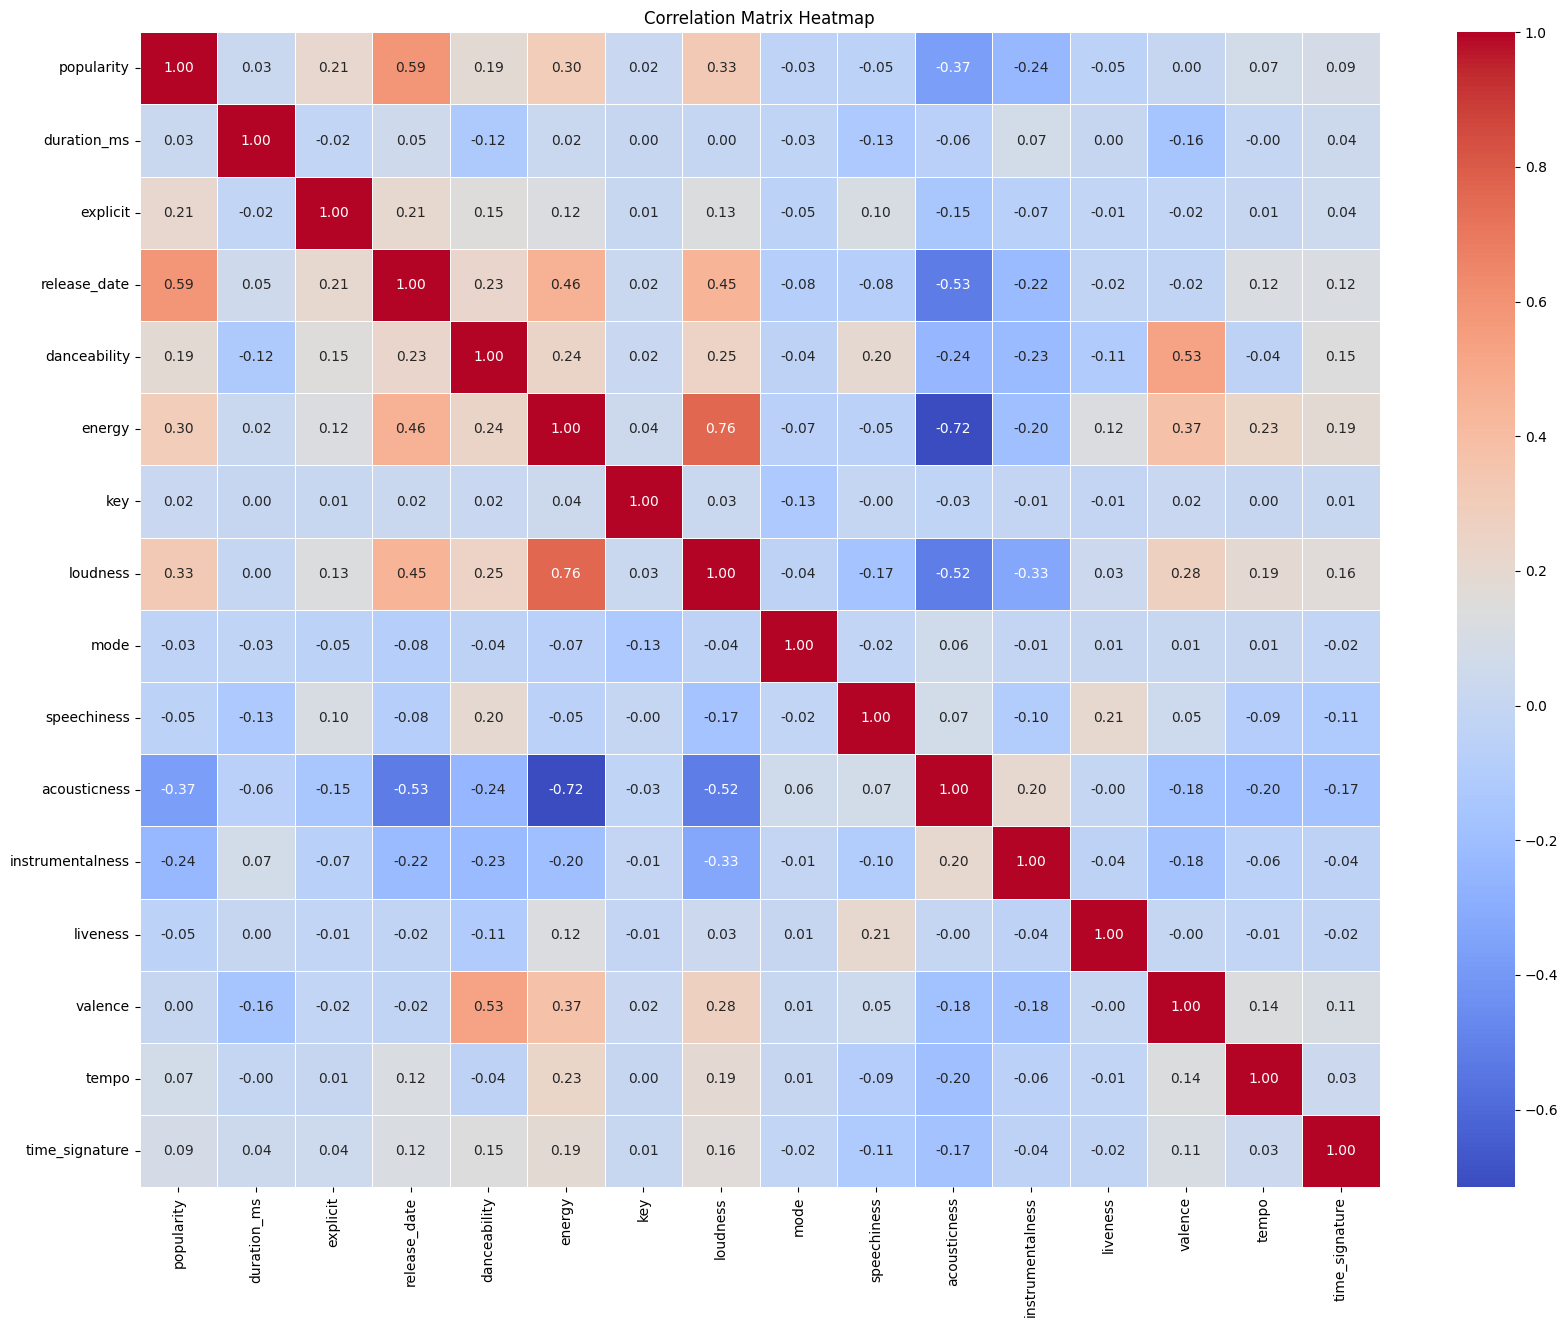

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,
            annot= True,
            cmap='coolwarm',
            fmt = '.2f',
            linewidths = .5
            )
plt.title('Correlation Matrix Heatmap')
plt.show()

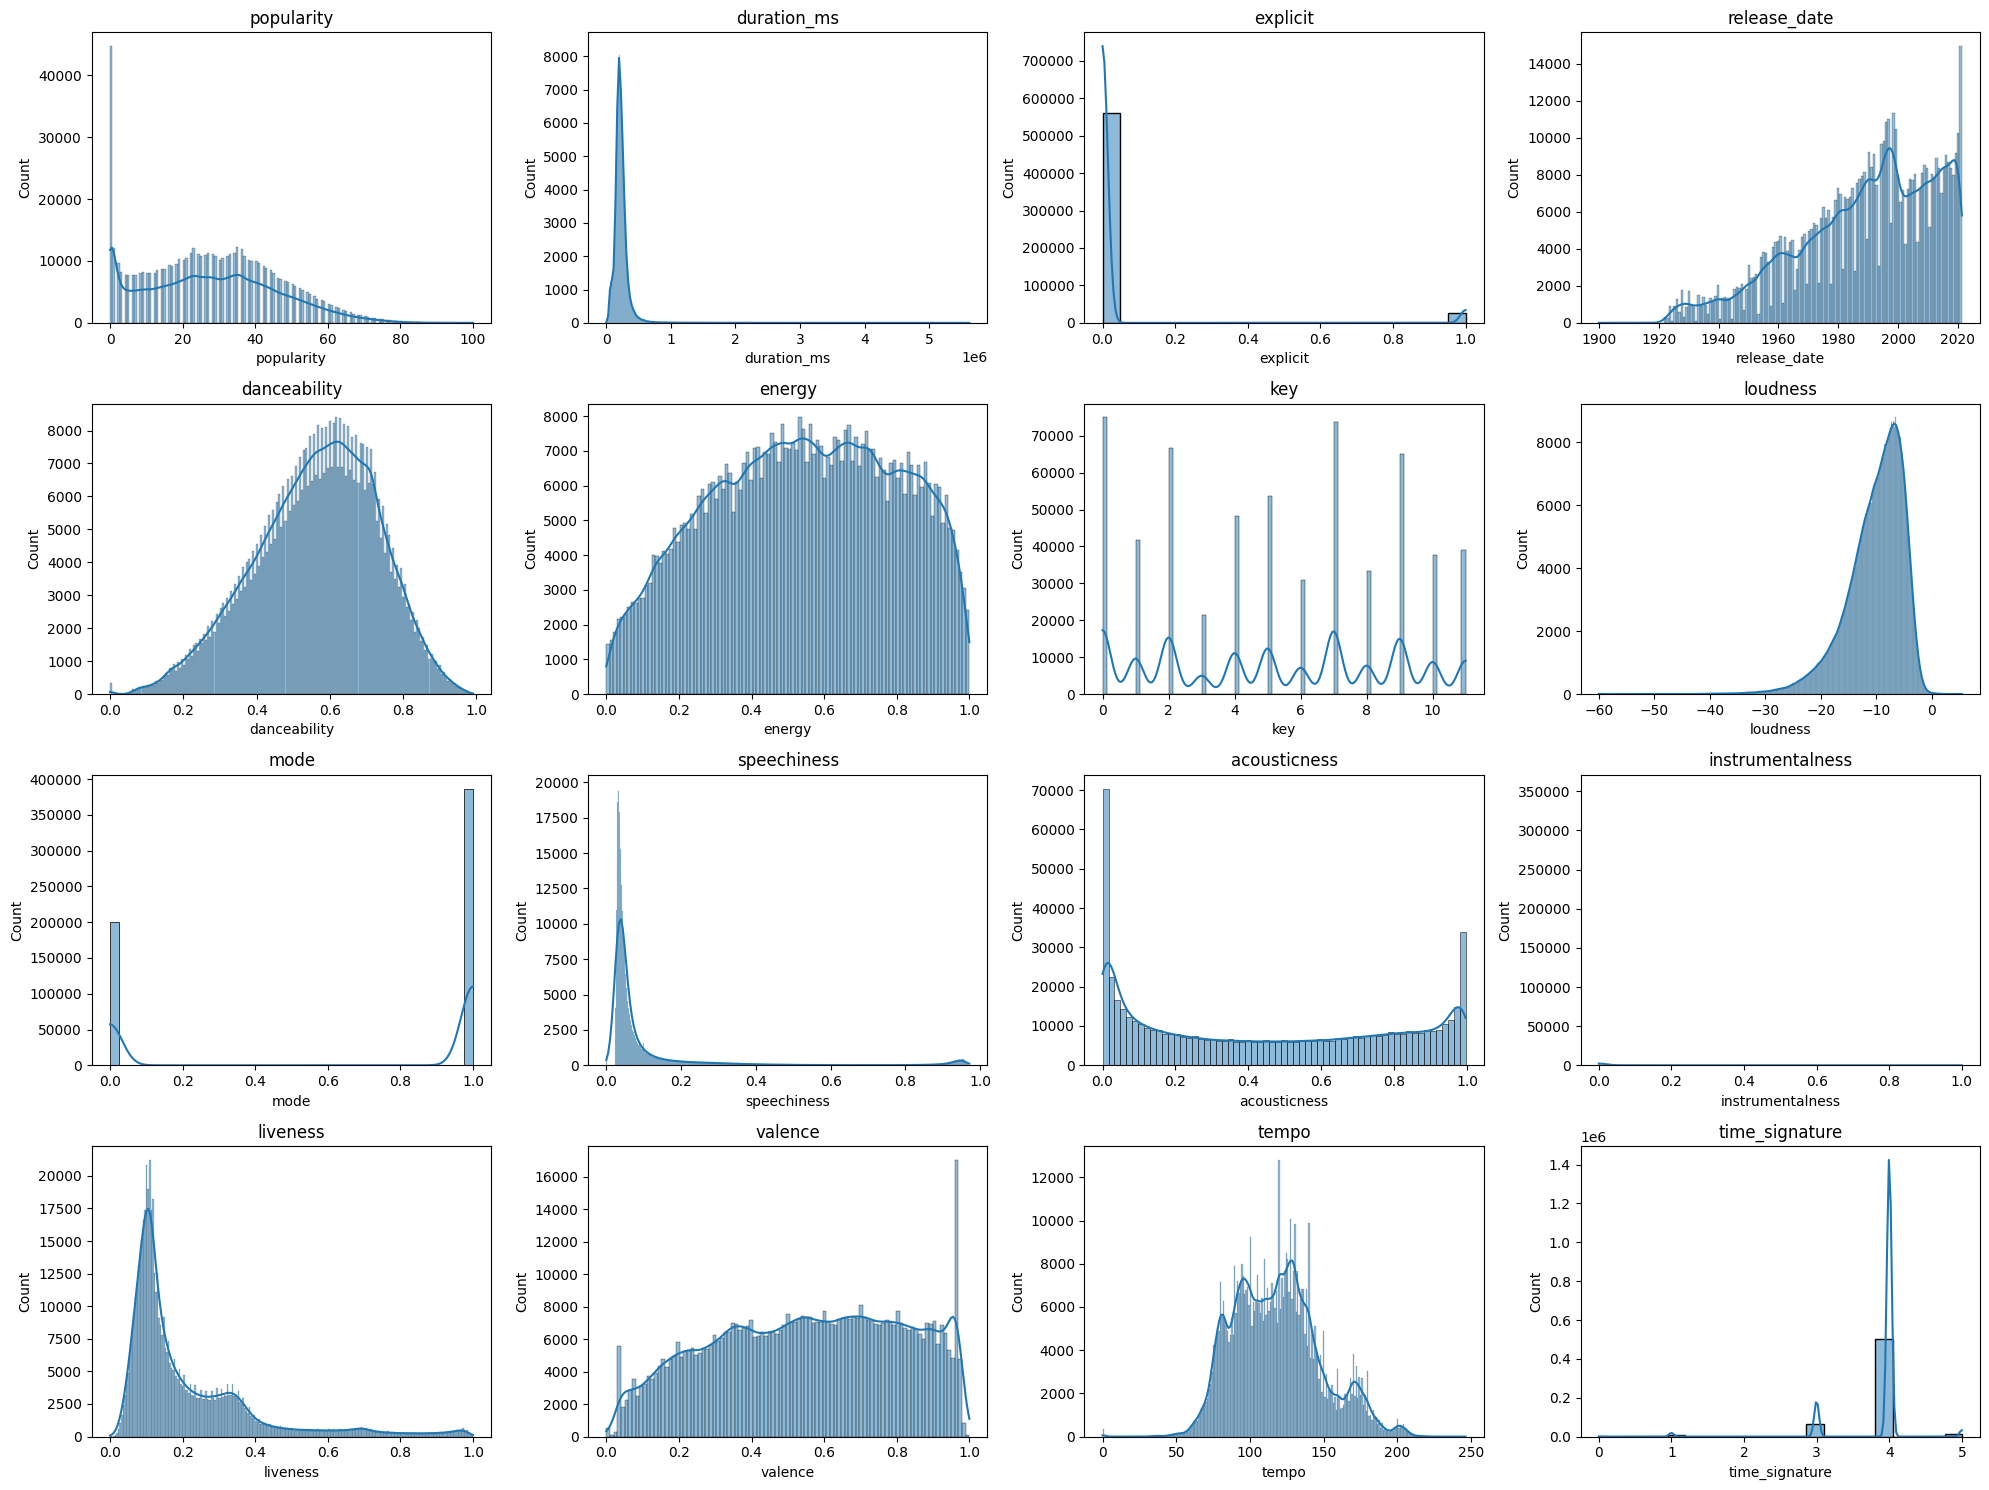

In [ ]:
# Source - https://stackoverflow.com/a/50774730
# Posted by ImportanceOfBeingErnest, modified by community. See post 'Timeline' for change history
# Retrieved 2026-02-15, License - CC BY-SA 4.0
plt.figure(figsize=(20,15))
for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(4,4,i)
    sns.histplot(df_numeric[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

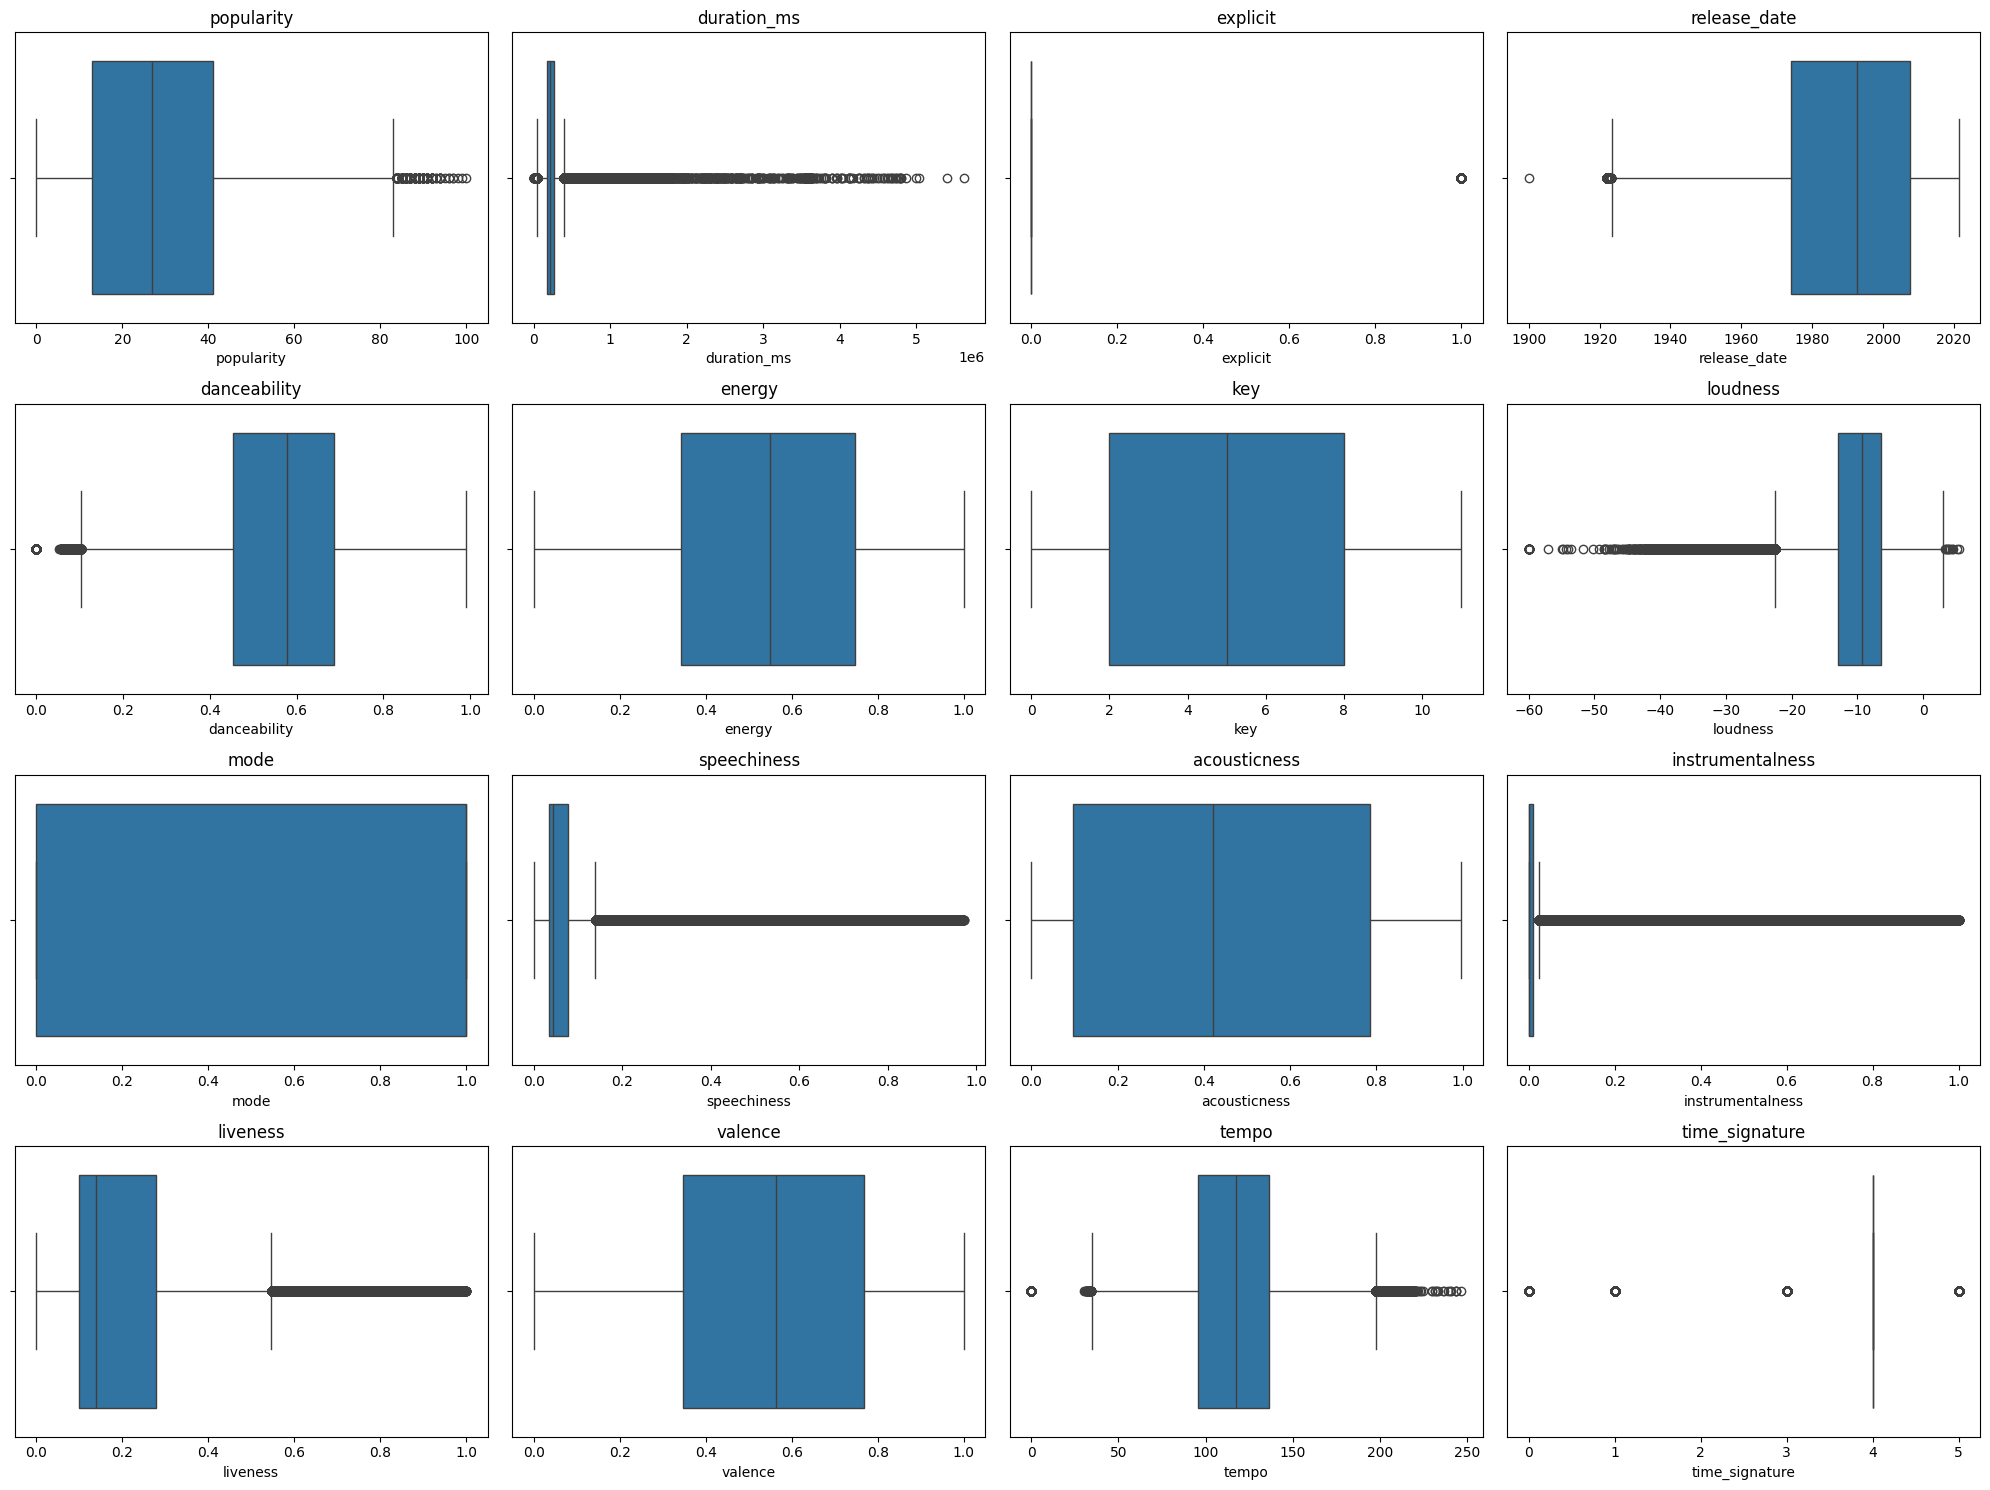


Feature: popularity
Quartile 1:
13.0 , 
Quartile 2:
27.0 , 
Quartile 3:
41.0, 
Interqartile Range:
28.0,
Lower Fence:
-29.0, 
Upper Fence:
83.0 

Feature: duration_ms
Quartile 1:
175093.0 , 
Quartile 2:
214893.0 , 
Quartile 3:
263867.0, 
Interqartile Range:
88774.0,
Lower Fence:
41932.0, 
Upper Fence:
397028.0 

Feature: explicit
Quartile 1:
0.0 , 
Quartile 2:
0.0 , 
Quartile 3:
0.0, 
Interqartile Range:
0.0,
Lower Fence:
0.0, 
Upper Fence:
0.0 

Feature: release_date
Quartile 1:
1974-01-01T00:00:00.000000000 , 
Quartile 2:
1992-07-31T00:00:00.000000000 , 
Quartile 3:
2007-09-21T00:00:00.000000000, 
Interqartile Range:
1064102400000000000 nanoseconds,
Lower Fence:
1923-06-04T00:00:00.000000000, 
Upper Fence:
2058-04-20T00:00:00.000000000 

Feature: danceability
Quartile 1:
0.453 , 
Quartile 2:
0.577 , 
Quartile 3:
0.686, 
Interqartile Range:
0.23300000000000004,
Lower Fence:
0.10349999999999998, 
Upper Fence:
1.0355 

Feature: energy
Quartile 1:
0.343 , 
Quartile 2:
0.549 , 
Quartile 

In [36]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df_numeric[col], orient = 'h')
    plt.title(col)

plt.tight_layout()
plt.show()

for i, col in enumerate(df_numeric.columns, 1):
    print(f"\nFeature: {col}")
    print("Quartile 1:\n{} , \nQuartile 2:\n{} , \nQuartile 3:\n{}, \nInterqartile Range:\n{},\nLower Fence:\n{}, \nUpper Fence:\n{} "
      .format(np.percentile(df_numeric[col],25),
              np.percentile(df_numeric[col],50), 
              np.percentile(df_numeric[col],75),
              np.percentile(df_numeric[col],75) - np.percentile(df_numeric[col],25),
              (np.percentile(df_numeric[col],25)) - (1.5 * (np.percentile(df_numeric[col],75) - np.percentile(df_numeric[col],25))),
              (np.percentile(df_numeric[col],75)) + (1.5 * (np.percentile(df_numeric[col],75) - np.percentile(df_numeric[col],25)))
            )
    )